# Capstone M6 Project REDO

Objective: To build a classification model predicting the cause of delay, a multi-class classification task, then discovering
whether a flight will be delayed based on provided factors from this dataset

https://data.world/data-society/airlines-delay

# Exploration

In [5]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, balanced_accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, RidgeCV, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from IPython.display import Image, display
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

sns.set_theme()

In [6]:
os.listdir("Data")

['DelayedFlights.csv',
 'DelayedFlights_10k.csv',
 'DelayedFlights_500k.csv',
 'DelayedFlights_750k.csv']

In [7]:
df = pd.read_csv('Data/DelayedFlights_500k.csv')
df.sample(10) 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
459904,1434991,2008,3,13,4,1547,1505,1732.0,1705,UA,...,6.0,10,0,N,0,27.0,0.0,0.0,0.0,0.0
287487,917843,2008,2,1,5,1113,1055,1249.0,1223,EV,...,7.0,20,0,N,0,18.0,0.0,8.0,0.0,0.0
105598,338090,2008,1,1,2,1603,1555,1900.0,1857,EV,...,12.0,11,0,N,0,NaN,NaN,NaN,NaN,NaN
18431,58374,2008,1,21,1,2028,2010,2219.0,2155,WN,...,4.0,22,0,N,0,18.0,0.0,6.0,0.0,0.0
143322,470914,2008,1,30,3,1219,1200,1328.0,1310,9E,...,6.0,16,0,N,0,0.0,0.0,0.0,0.0,18.0
453802,1416482,2008,3,8,6,727,700,1023.0,945,UA,...,2.0,17,0,N,0,0.0,6.0,11.0,0.0,21.0
25175,78070,2008,1,27,7,1653,1630,1821.0,1805,WN,...,4.0,9,0,N,0,16.0,0.0,0.0,0.0,0.0
116138,381177,2008,1,18,5,1114,1050,1226.0,1205,MQ,...,7.0,17,0,N,0,0.0,0.0,0.0,0.0,21.0
292526,931729,2008,2,1,5,816,800,1337.0,1331,F9,...,10.0,12,0,N,0,NaN,NaN,NaN,NaN,NaN
437542,1356314,2008,3,7,5,1449,1408,1613.0,1539,OO,...,6.0,19,0,N,0,34.0,0.0,0.0,0.0,0.0


# Details

Unnamed: 0: automatically generated index column

Year: The year when the flight took place. (all within 2008) 

Month: The month of the year when flight took place (1 for January, 2 for February, etc.).

DayofMonth: The day of the month when the flight took place.

DayOfWeek: The day of the week when the flight took place, 1 for Monday, 2 for Tuesday, etc.

DepTime: The actual departure time (in hours and minute in military time

CRSDepTime: The scheduled departure time: Carrier's Reservation System (CRS).

ArrTime: The actual arrival time of the flight, military time.

CRSArrTime: The scheduled arrival time according to the CRS.

UniqueCarrier: Carrier code for airline

FlightNum: The flight number assigned by the airline.

TailNum: unique aircraft tail number

ActualElapsedTime: The actual elapsed time of the flight in minutes, takeoff to landing.

CRSElapsedTime: The scheduled elapsed time of the flight in minutes, as per CRS (Carrier's Reservation System)

AirTime: The time the aircraft was actually in the air,

ArrDelay: Difference between scheduled arrival time and actual arrival time in minutes. Positive values indicate a delayed arrival.

DepDelay: The difference between the scheduled departure time and the actual departure time in minutes. Positive values indicate a delayed departure.

Origin: The airport of origin

Dest: The destination airport

Distance: The distance between the origin and destination airports in miles.

TaxiIn: The time in minutes that the aircraft spent taxiing from the runway to the gate after landing.

TaxiOut: The time in minutes that the aircraft spent taxiing from the gate to the runway before takeoff.

Cancelled: binary (0 or 1) whether the flight was canceled or not

CancellationCode: If the flight was canceled, this column indicates the reason:
A: Carrier
B: Weather
C: National Air System
D: Security

Diverted: binary indicator (0-1) showing flight was diverted to another airport.

CarrierDelay: The delay in minutes caused by the carrier (e.g., due to maintenance issues).

WeatherDelay: The delay in minutes caused by weather conditions.

NASDelay: The delay in minutes caused by the National Air System, including non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

SecurityDelay: The delay in minutes caused by security-related issues.

LateAircraftDelay: The delay in minutes caused by the late arrival of the aircraft from a previous flight.

# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         499999 non-null  int64  
 1   Year               499999 non-null  int64  
 2   Month              499999 non-null  int64  
 3   DayofMonth         499999 non-null  int64  
 4   DayOfWeek          499999 non-null  int64  
 5   DepTime            499999 non-null  int64  
 6   CRSDepTime         499999 non-null  int64  
 7   ArrTime            498064 non-null  float64
 8   CRSArrTime         499999 non-null  int64  
 9   UniqueCarrier      499999 non-null  object 
 10  FlightNum          499999 non-null  int64  
 11  TailNum            499998 non-null  object 
 12  ActualElapsedTime  498064 non-null  float64
 13  CRSElapsedTime     499921 non-null  float64
 14  AirTime            498064 non-null  float64
 15  ArrDelay           498064 non-null  float64
 16  De

In [12]:
# Dataset with 499,999, 30 columns, integers, floats, & categorical data.

In [13]:
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                1935
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   1
ActualElapsedTime      1935
CRSElapsedTime           78
AirTime                1935
ArrDelay               1935
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 1935
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         170299
WeatherDelay         170299
NASDelay             170299
SecurityDelay        170299
LateAircraftDelay    170299
dtype: int64

In [14]:
# Handling missing values
delay_columns = ['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_columns] = df[delay_columns].fillna(0)  # Fill delay-related NaNs with 0 

# fill with the median for relevant time columns
time_columns = ['ArrTime', 'ActualElapsedTime', 'AirTime', 'TaxiIn']
df[time_columns] = df[time_columns].fillna(df[time_columns].median())

# Dropping irrelevant columns 
df = df.drop(columns=['Unnamed: 0', 'TailNum', 'Year']) # all in year 2008

# Drop rows with missing values in critical columns
df = df.dropna(subset=['ArrDelay', 'DepDelay', 'ActualElapsedTime', 'ArrTime', 'CRSElapsedTime'])

# Filling TaxiOut with median
df['TaxiOut'] = df['TaxiOut'].fillna(df['TaxiOut'].median())

# Checking missing values
print(df.isnull().sum())

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [15]:
for column in df.columns: # Loop through each column and print unique values
    print(f"Unique values in {column}:")
    print(df[column].unique())

df.shape

Unique values in Month:
[1 2 3]
Unique values in DayofMonth:
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
Unique values in DayOfWeek:
[4 5 6 7 1 2 3]
Unique values in DepTime:
[2003  754  628 ...  228  312  248]
Unique values in CRSDepTime:
[1955  735  620 ... 2256  536  543]
Unique values in ArrTime:
[2211. 1002.  804. ...  401.  437.  405.]
Unique values in CRSArrTime:
[2225 1000  750 ...  321  351  133]
Unique values in UniqueCarrier:
['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
Unique values in FlightNum:
[ 335 3231  448 ... 4642 4682 3195]
Unique values in ActualElapsedTime:
[128.  96.  90. 101. 240. 130. 121.  52. 228. 226. 123.  56.  57.  54.
  59. 155. 165. 147. 154. 146. 145. 135. 127. 153. 150. 152. 163. 136.
  69.  70. 143.  71.  99.  86.  65.  63. 119. 134.  51.  75.  74.  83.
  79. 256. 124. 148. 149. 275. 196. 204.  98. 233.  66.  58.  64.  60.
  73. 260. 245. 242.

(499921, 27)

In [16]:
# Duplicates:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates() # only 2 duplicates

Duplicate rows: 2


In [17]:
df.shape

(499919, 27)

# Visuals

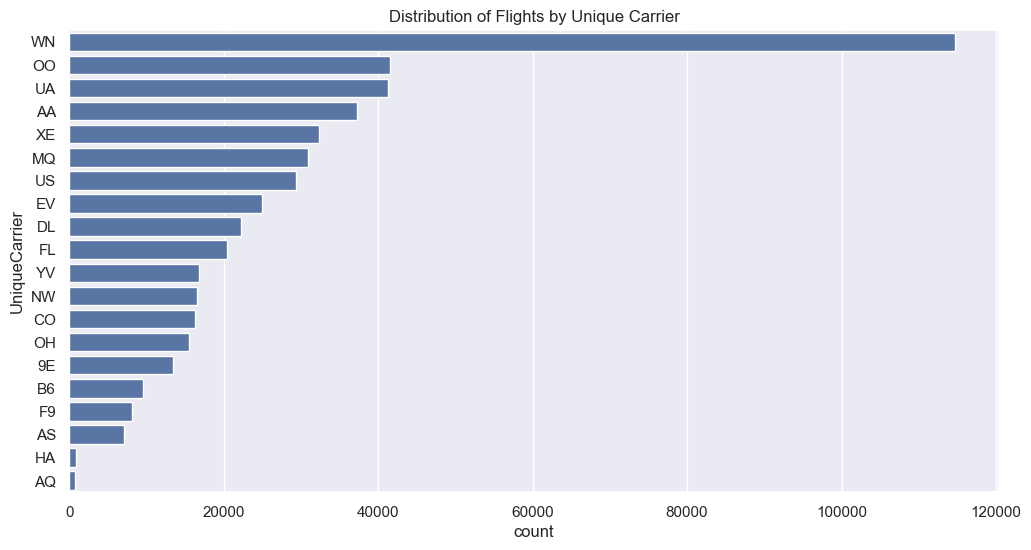

In [19]:
# Distribution of UniqueCarriers
plt.figure(figsize=(12, 6))
sns.countplot(y=df['UniqueCarrier'], order=df['UniqueCarrier'].value_counts().index)
plt.title('Distribution of Flights by Unique Carrier')
plt.show()

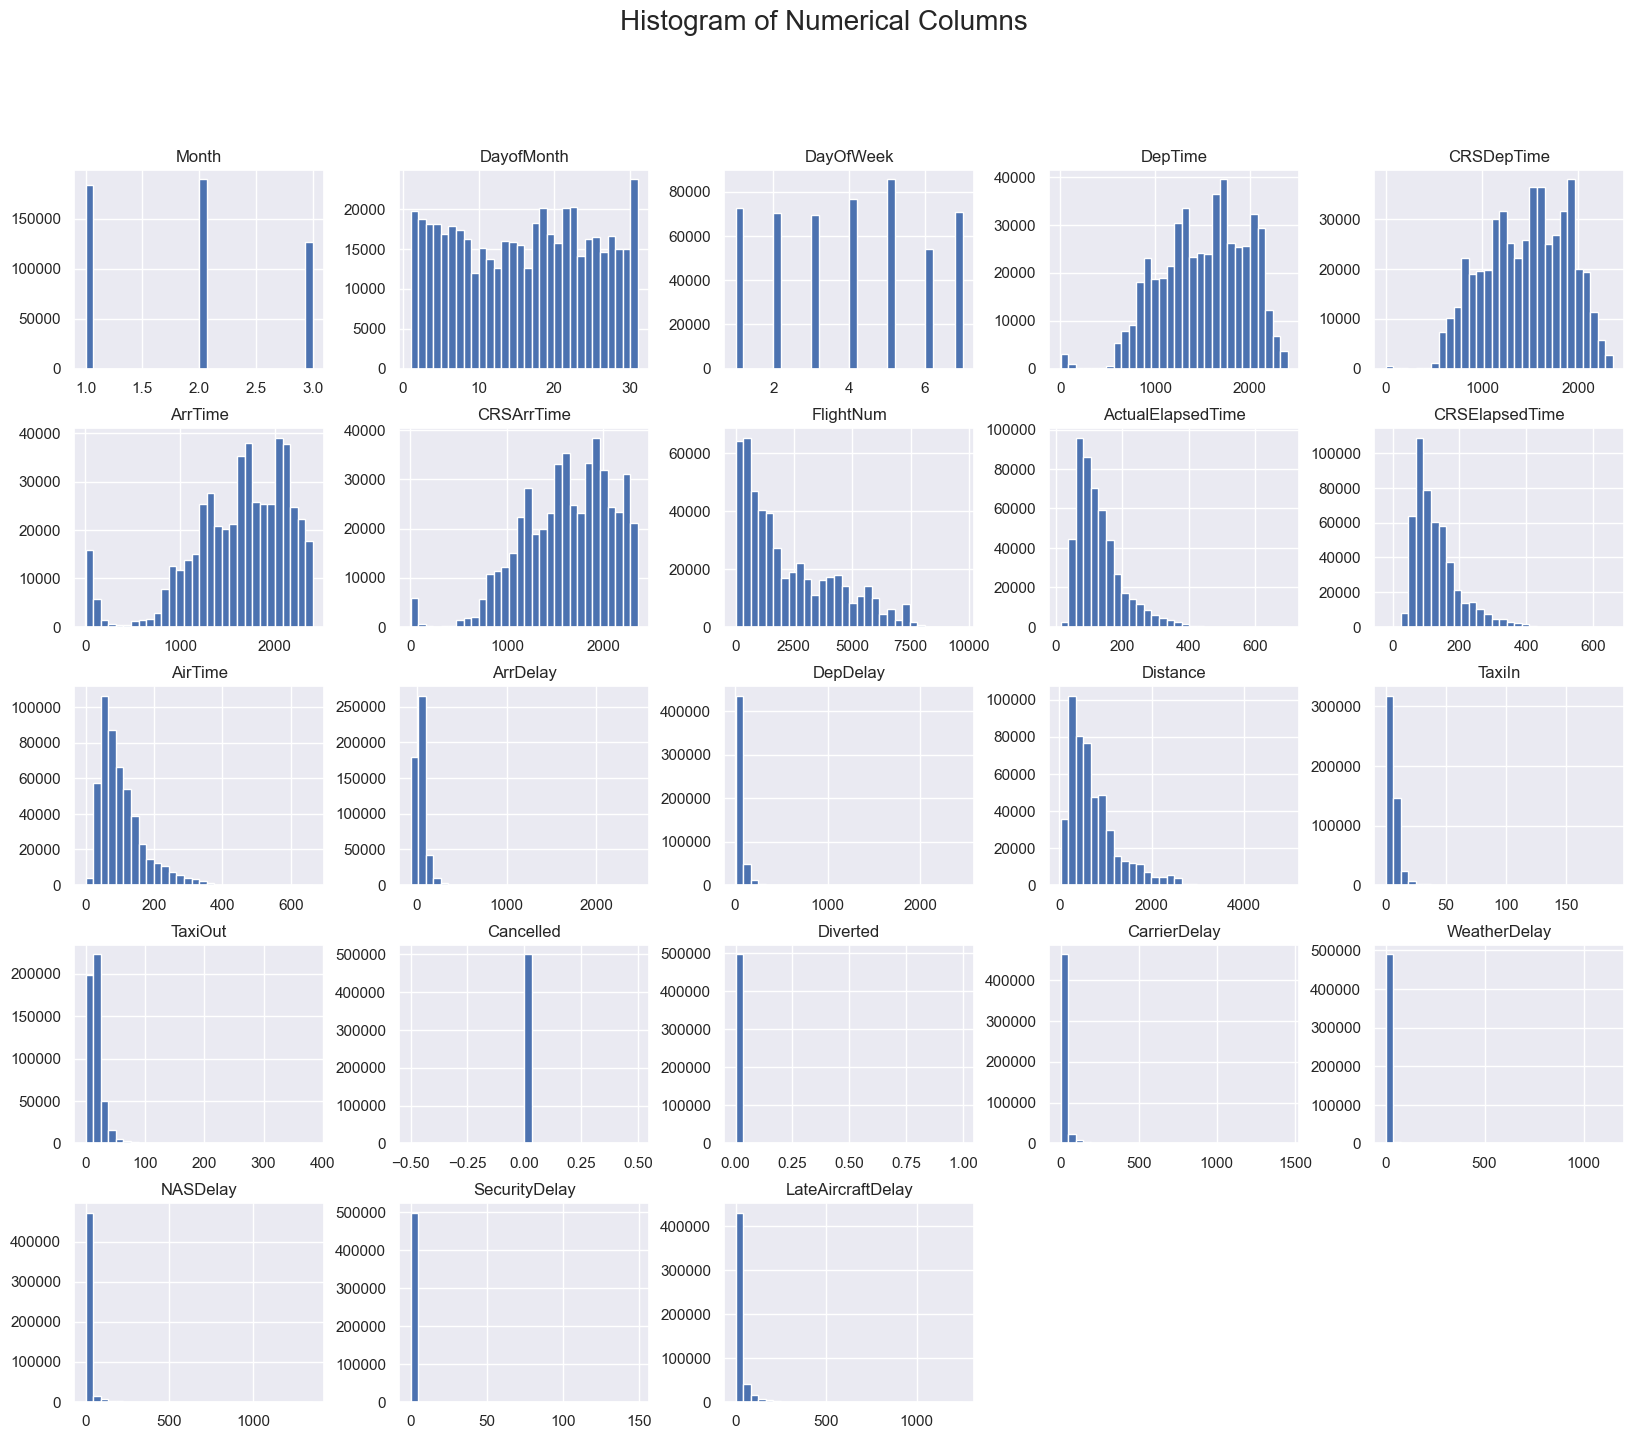

In [20]:
df.hist(figsize=(20, 16), bins=30)
plt.suptitle("Histogram of Numerical Columns", fontsize=20)
plt.show()

In [21]:
# Huge jump on day 30 for DayOFMonth, lot of people travel on 30th (?)

C:\Users\741mp\AppData\Local\Temp\ipykernel_18308\2786932311.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='ArrDelay', data=avg_delay_by_day, hue=None, palette='coolwarm', ax=axs[1, 0])
C:\Users\741mp\AppData\Local\Temp\ipykernel_18308\2786932311.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend().remove()  # not needed
C:\Users\741mp\AppData\Local\Temp\ipykernel_18308\2786932311.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UniqueCarrier', y='DepDelay', data=df, estimator=sum, hue=None, palette='magma', ax=axs[1

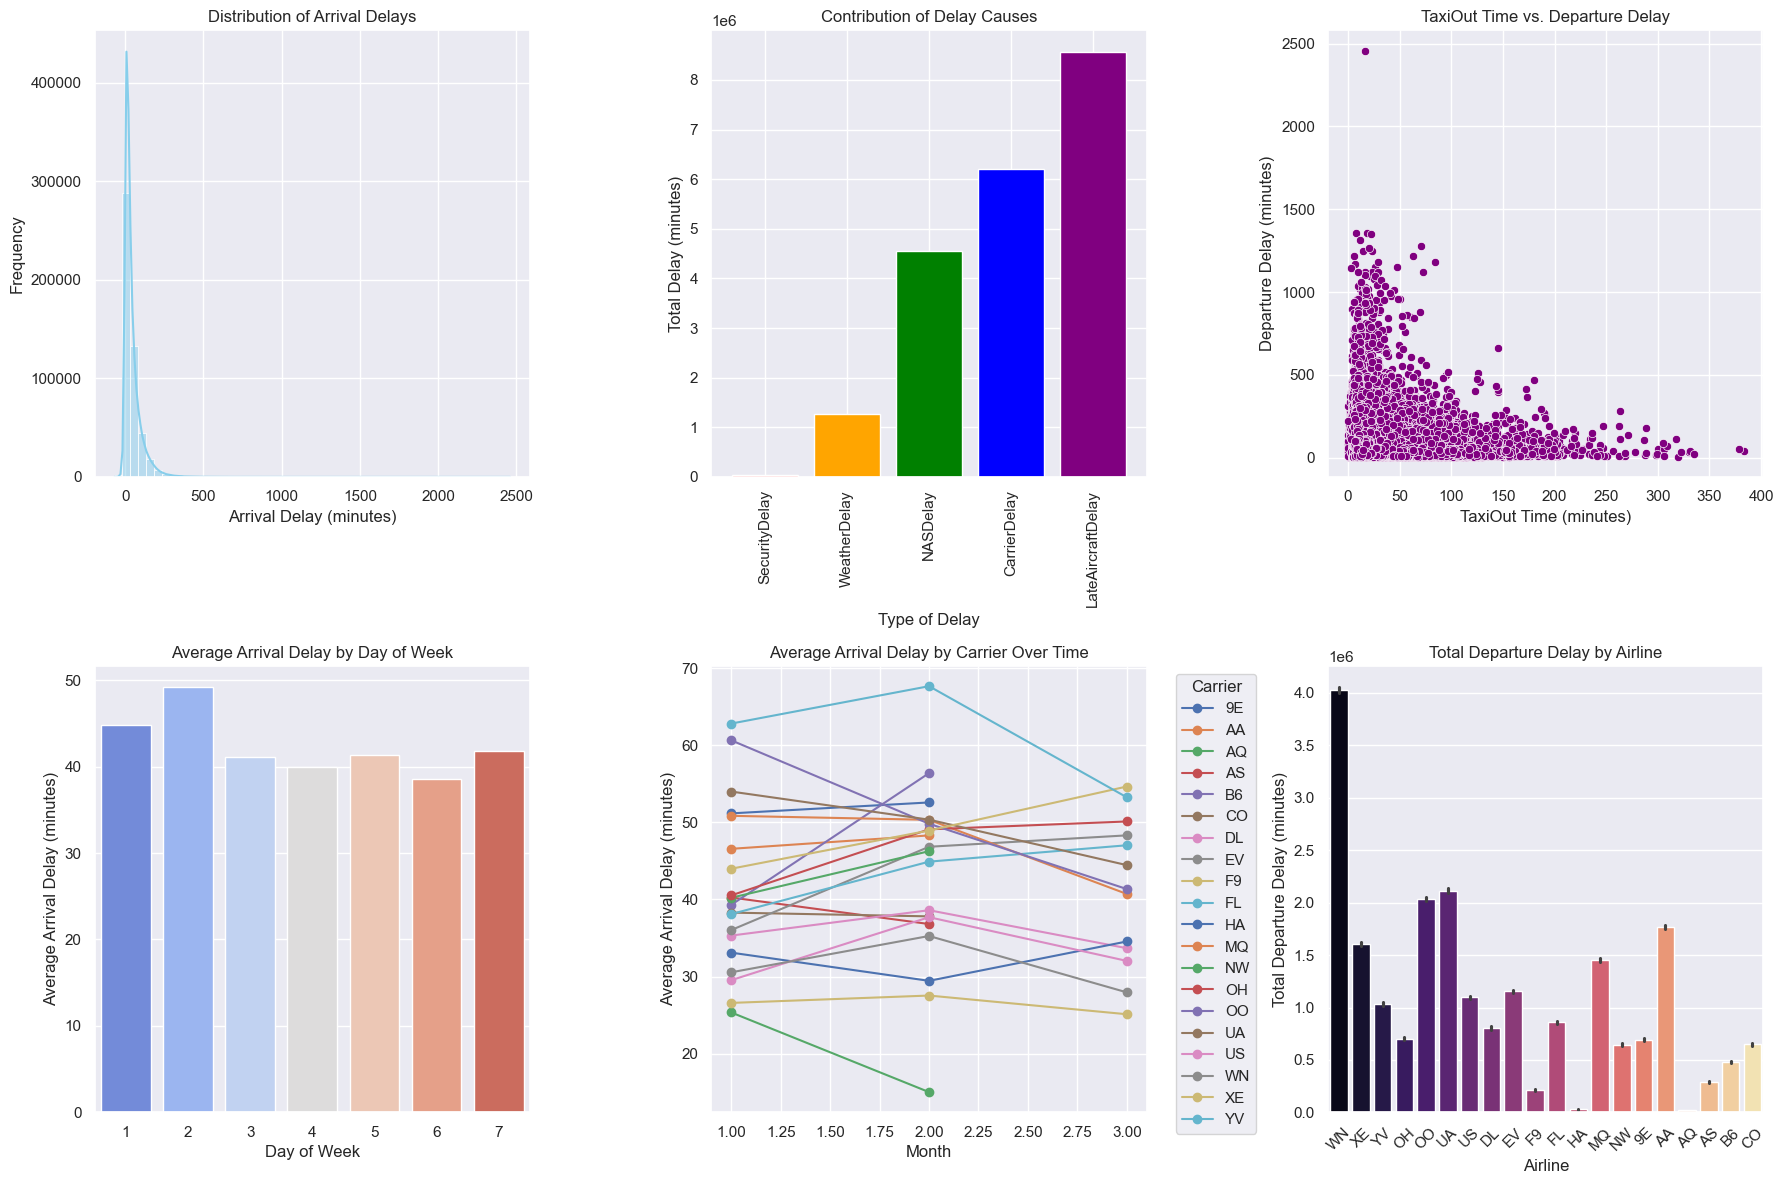

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# 1 Histogram of Arrival Delays
sns.histplot(df['ArrDelay'], bins=50, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Arrival Delays')
axs[0, 0].set_xlabel('Arrival Delay (minutes)')
axs[0, 0].set_ylabel('Frequency')

# 2 Bar Plot of Contribution of Delay Causes
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_sums = df[delay_cols].sum().sort_values(ascending=True)
delay_sums.plot(kind='bar', stacked=True, color=['red', 'orange', 'green', 'blue', 'purple'], width=0.8, ax=axs[0, 1])
axs[0, 1].set_title('Contribution of Delay Causes')
axs[0, 1].set_xlabel('Type of Delay')
axs[0, 1].set_ylabel('Total Delay (minutes)')

# 3 Scatter Plot of TaxiOut Time vs. Departure Delay
sns.scatterplot(x='TaxiOut', y='DepDelay', data=df, color='purple', ax=axs[0, 2])
axs[0, 2].set_title('TaxiOut Time vs. Departure Delay')
axs[0, 2].set_xlabel('TaxiOut Time (minutes)')
axs[0, 2].set_ylabel('Departure Delay (minutes)')

# 4 Bar Plot of Average Arrival Delay by DayOfWeek
avg_delay_by_day = df.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()
sns.barplot(x='DayOfWeek', y='ArrDelay', data=avg_delay_by_day, hue=None, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Average Arrival Delay by Day of Week')
axs[1, 0].set_xlabel('Day of Week')
axs[1, 0].set_ylabel('Average Arrival Delay (minutes)')
axs[1, 0].legend().remove()  # not needed

# 5 Line Plot of Average Arrival Delay by Carrier Over Time
avg_delay_by_carrier_month = df.groupby(['Month', 'UniqueCarrier'])['ArrDelay'].mean().unstack()
avg_delay_by_carrier_month.plot(kind='line', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Average Arrival Delay by Carrier Over Time')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Arrival Delay (minutes)')
axs[1, 1].legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 1].grid(True)

# 6 Bar Plot of Total Departure Delay by Airline
sns.barplot(x='UniqueCarrier', y='DepDelay', data=df, estimator=sum, hue=None, palette='magma', ax=axs[1, 2])
axs[1, 2].set_title('Total Departure Delay by Airline')
axs[1, 2].set_xlabel('Airline')
axs[1, 2].set_ylabel('Total Departure Delay (minutes)')
axs[1, 2].tick_params(axis='x', rotation=45)  # Rotate x-tick labels

plt.tight_layout()
plt.show()

In [23]:
# 1: most flights arrive on time or with minimal delays, there are small number of flights with significant delays towards the right

# 2: Late Aircraft Delay is the most significant contributor to total delay minutes
# 2nd due to issues under the airline's control  (crew problems / maintenance)
# 3rd is National Aviation System (NAS), which could be due to issues like heavy air traffic or airport operations

# 3: Relationship btw TaxiOut Time and Departure Delay
# Most flights have shorter TaxiOut times and correspondingly lower Departure Delays.
# Departure Delay tends to decrease as TaxiOut time increases

# 4: many travelers during all dats of the week, significally tuesday, Friday & Saturday.

# 5: chaotic chart showing different airlines, XE (yellow) and XN (grey) seems to do well in keeping average arrival delays to a minimul, 
# NW only did well for 2 months (?)

# 6: WN seems to have the least total arrival delay of any airline,

In [24]:
# Total delay feature just to see who has most delays overall
df['TotalDelay'] = df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay']

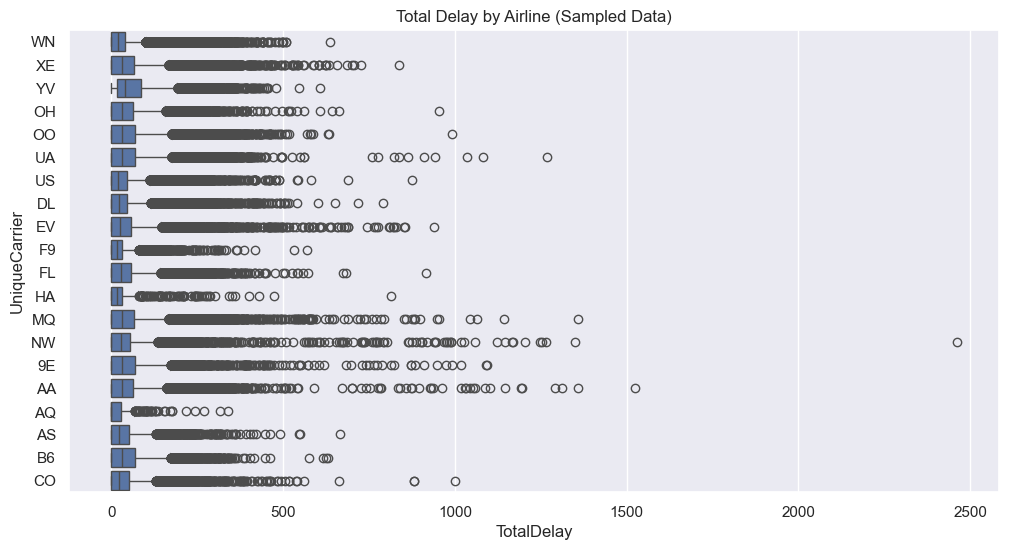

In [25]:
# Plot distributions of delays by airline using the sample
plt.figure(figsize=(12, 6))
sns.boxplot(x='TotalDelay', y='UniqueCarrier', data=df)
plt.title('Total Delay by Airline (Sampled Data)')
plt.show()

In [26]:
# AQ seems to do the best in avoiding delays overall, even outliers, would be wise to find out why other airlines are so impacted.
# NW has some very large outlier values
# Model will figure out: why certain airlines may be dealing with specific types of delays

# overall the majority of airlines manage to keep their percentiles quite low, outliers are certainly extremes, overall expected, nice to see AQ does do well amongst the others. Might be a new airline.

In [27]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Display only columns with missing values

Series([], dtype: int64)


# Model that predicts delay causes,

In [29]:
# Feature Engineering
df['DepTime_hour'] = df['DepTime'] // 100
df['ArrTime_hour'] = df['ArrTime'] // 100
df['Is_Morning_Flight'] = df['DepTime_hour'].apply(lambda x: 1 if 6 <= x < 12 else 0)
df['Is_Evening_Flight'] = df['DepTime_hour'].apply(lambda x: 1 if 18 <= x < 24 else 0)

# Define Features and Target
features = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime_hour', 'ArrTime_hour',
            'Is_Morning_Flight', 'Is_Evening_Flight', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay']
categorical_features = ['UniqueCarrier', 'Origin', 'Dest']

# Encode Categorical Features
one_hot = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = one_hot.fit_transform(df[categorical_features])

# Combine Encoded Features with Original Features
X = pd.concat([df[features], pd.DataFrame(X_encoded, index=df.index)], axis=1)
y = df[['CarrierDelay', 'LateAircraftDelay', 'NASDelay']].idxmax(axis=1)

# Convert Columns to Strings to Avoid Type Errors
X.columns = X.columns.astype(str)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Downsample the training data for hyperparameter tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)

# Initialize RandomizedSearchCV on the smaller subset
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, n_iter=5, cv=2, n_jobs=-1, verbose=1, scoring='accuracy', random_state=42)
random_search.fit(X_train_sample, y_train_sample)

# Evaluate the Best Random Forest Model
best_rf_model = random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Fitting 2 folds for each of 5 candidates, totalling 10 fits
Random Forest Accuracy: 0.7941403957966608
                   precision    recall  f1-score   support

     CarrierDelay       0.85      0.85      0.85     84859
LateAircraftDelay       0.70      0.77      0.74     45401
         NASDelay       0.79      0.59      0.68     19716

         accuracy                           0.79    149976
        macro avg       0.78      0.74      0.75    149976
     weighted avg       0.80      0.79      0.79    149976



In [30]:
# The RandomForestClassifier model has achieved an accuracy of 79.5% in predicting flight delay causes using the provided dataset.
# It performed well in predicting CarrierDelay with an F1-score of 0.85, and moderately for LateAircraftDelay with an F1-score of 0.75.
# room for improvement in predicting NASDelay F1-score of 0.68

In [45]:
# first model
joblib.dump(best_rf_model, 'model1.joblib')

['model1.joblib']

In [31]:
# Compare to another model

In [41]:
# 100% of data.
logistic_model = LogisticRegression(multi_class='ovr', max_iter=500, solver='saga', random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate Logistic Regression Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\741mp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.6923307729236677
                   precision    recall  f1-score   support

     CarrierDelay       0.71      0.90      0.79     84859
LateAircraftDelay       0.65      0.42      0.51     45401
         NASDelay       0.68      0.44      0.54     19716

         accuracy                           0.69    149976
        macro avg       0.68      0.59      0.61    149976
     weighted avg       0.68      0.69      0.67    149976



In [47]:
# second model
joblib.dump(logistic_model, 'model2.joblib')

['model2.joblib']

In [ ]:
# The Random Forest model achieved an overall accuracy of approximately 80.43%, significantly higher than Logistic Regression model (68.54%) which is expected,
# The Random Forest model showed better performance across all delay categories as seen by its higher precision, recall, and F1-scores. 
# CarrierDelay precision and recall are both around 0.86, indicating that it correctly identifies a large proportion of both positive and negative cases for carrierDelays.

# Meanwhile, Logistic Regression shows lower precision & recall,
# LateAircraftDelay and NASDelay, with recall values as low as %41 and %39, respectively, 
# therer is a struggle to correctly classify instances of these delays.

In [ ]:
# More to be explored.

In [ ]:
# Classification task to predict the cause of flight delays based on features from the dataset overall.
# OHC to categorical columns only
categorical_columns = ['UniqueCarrier', 'Origin', 'Dest', 'CancellationCode']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
# # Sample a portion of the dataset (e.g., 50%)
# df_sampled = df_encoded.sample(frac=0.5, random_state=42)  # Adjust the fraction as needed

# # Convert delay columns into binary labels, focusing on the top 3 delays
# df_sampled['CarrierDelayBinary'] = df_sampled['CarrierDelay'].apply(lambda x: 1 if x > 0 else 0)
# df_sampled['NASDelayBinary'] = df_sampled['NASDelay'].apply(lambda x: 1 if x > 0 else 0)
# df_sampled['LateAircraftDelayBinary'] = df_sampled['LateAircraftDelay'].apply(lambda x: 1 if x > 0 else 0)

# # Select relevant columns including encoded Origin and Dest airports
# X = df_sampled[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'Distance'] + 
#                [col for col in df_sampled.columns if 'Origin_' in col or 'Dest_' in col]]
# y_multi_label = df_sampled[['CarrierDelayBinary', 'NASDelayBinary', 'LateAircraftDelayBinary']]

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y_multi_label, test_size=0.3, random_state=42)


In [ ]:
# # RandomForest Classifier Pipeline with class_weight='balanced'
# pipeline_rf = Pipeline([
#     ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')))
# ])

# # Train the Random Forest model
# pipeline_rf.fit(X_train, y_train)

# # Predictions with Random Forest
# y_pred_rf = pipeline_rf.predict(X_test)

# # Evaluation for Random Forest
# print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
# for i, delay_type in enumerate(y_multi_label.columns):
#     print(f"\nRandom Forest - Classification Report for {delay_type}:")
#     print(classification_report(y_test[delay_type], y_pred_rf[:, i]))

In [ ]:
# # Logistic Regression Pipeline
# pipeline_lr = Pipeline([
#     ('scaler', StandardScaler()),  # Standardize numerical features for Logistic Regression
#     ('classifier', MultiOutputClassifier(LogisticRegression(class_weight='balanced', random_state=42)))
# ])

# pipeline_lr.fit(X_train, y_train) # Train the Logistic Regression model
# y_pred_lr = pipeline_lr.predict(X_test) # Predictions with Logistic Regression

# # Evaluation for Logistic Regression
# print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
# for i, delay_type in enumerate(y_multi_label.columns):
#     print(f"\nLogistic Regression - Classification Report for {delay_type}:")
#     print(classification_report(y_test[delay_type], y_pred_lr[:, i]))

In [ ]:
# # Define parameter grid for GridSearchCV
# param_grid = {
#     'classifier__estimator__n_estimators': [50, 100, 200],
#     'classifier__estimator__max_depth': [10, 20, None],
#     'classifier__estimator__min_samples_split': [2, 5, 10]
# }

# # Perform GridSearchCV on the pipeline
# grid_search = GridSearchCV(pipeline_rf, param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters found: ", grid_search.best_params_)

# # Access the best estimator from GridSearchCV
# best_pipeline = grid_search.best_estimator_

# # Feature importance for each label using the best model
# for i, delay_type in enumerate(y_multi_label.columns):
#     importances = best_pipeline.named_steps['classifier'].estimators_[i].feature_importances_
#     indices = np.argsort(importances)[::-1]
#     print(f"\nFeature importances for {delay_type}:")
#     for f in range(X_train.shape[1]):
#         print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")
